# Feature Engineering 

## All Techniques to handle Missing Values

In a, Lifecycle of a Data Science Projects:

1. Data Collection Statergy---from company side,3rd party API's,Surveys
2. Feature Engineering---Handling Missing Values

Why are their Missing values?? 

1. They hesitate to put down the information
2. Survey informations are not that valid.
3. Eg-Men--salary
4. Eg-Women---age
5. People may have died----NAN

Data Science Projects---Dataset should be collected from multiple sources.

What are the different types of Missing Data?

1) Missing Completely at Random, MCAR:

A variable is missing completely at random (MCAR) if the probability of being missing is the same for all the observations. 
When data is MCAR, there is absolutely no relationship between the data missing and any other values, observed or missing, within the dataset. 
In other words, those missing data points are a random subset of the data. 
There is nothing systematic going on that makes some data more likely to be missing than other.

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('titanic.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


2. Missing Data Not At Random(MNAR): Systematic missing Values:

There is absolutely some relationship between the data missing and any other values, observed or missing, within the dataset.

In [6]:
import numpy as np

In [7]:
df['cabin_null']=np.where(df['Cabin'].isnull(),1,0)

In [8]:
##find the percentage of null values
df['cabin_null'].mean()

0.7710437710437711

In [9]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'cabin_null'],
      dtype='object')

In [10]:
df.groupby(['Survived'])['cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64

3. Missing At Random(MAR):

Men---hide their salary
Women---hide their age

### Here, All the techniques of handling Missing values are:

1. Mean/ Median/Mode Imputation(replacement)
2. Random Sample Imputation
3. Capturing NAN values with a new feature
4. End of Distribution Imputation
5. Arbitrary Value Imputation

1. Mean/ MEdian /Mode Imputation(replacement):

When should we apply? Mean/median imputation has the assumption that the data are missing completely at random(MCAR). 
We solve this by replacing the NAN with the most frequent occurance of the variables

Advantages And Disadvantages of Mean/Median Imputation:

Advantages:

1. Easy to implement(Robust to outliers)
2. Faster way to obtain the complete dataset

Disadvantages:

1. Change or Distortion in the original variance
2. Impacts Correlation

In [11]:
df=pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])

In [12]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [13]:
## Lets see the percentage of missing values
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [14]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)

In [15]:
median=df.Age.median()
median

28.0

In [16]:
impute_nan(df,'Age',median)
df.head()

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [17]:
print(df['Age'].std())
print(df['Age_median'].std())

14.526497332334044
13.019696550973194


In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

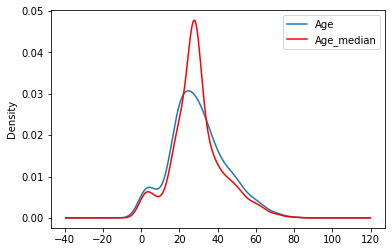

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_median.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

2. Random Sample Imputation:
Aim: Random sample imputation consists of taking random observation from the dataset 
     and we use this observation to replace the nan values.
     
When should it be used? It assumes that the data are missing completely at random(MCAR).


Advantages and Disadvantages of Random Sample Imputation:

Advantages:

1. Easy To implement
2. There is less distortion in variance

Disadvantage:
1. Every situation randomness wont work

In [20]:
import pandas as pd

In [21]:
df=pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])

In [22]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [23]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [24]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [25]:
df['Age'].isnull().sum()

177

In [26]:
df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [27]:
df[df['Age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [28]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)
    df[variable+"_random"]=df[variable]
    ##It will have the random sample to fill the na
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [29]:
median=df.Age.median()

In [30]:
median

28.0

In [31]:
impute_nan(df,"Age",median)

In [32]:
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

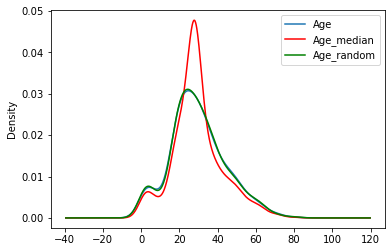

In [34]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_median.plot(kind='kde', ax=ax, color='red')
df.Age_random.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

3. Capturing NAN values with a new feature:
It works well if the data are not missing completely at random.

Advantages and Disadvantages of Capturing NAN values with a new feature:

Advantages:

1. Easy to implement
2. Captures the importance of missing values

Disadvantage:

1. Creating Additional Features(Curse of Dimensionality)

In [35]:
df=pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])

In [36]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [37]:
import numpy as np

In [38]:
df['Age_NAN']=np.where(df['Age'].isnull(),1,0)

In [39]:
df.head()

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


In [40]:
df.Age.median()

28.0

In [41]:
df['Age'].fillna(df.Age.median(),inplace=True)

In [42]:
df.head(10)

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


4. End of Distribution Imputation:

In [43]:
df=pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])

In [44]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


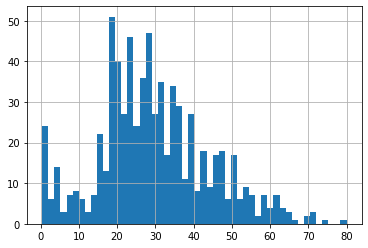

In [45]:
df.Age.hist(bins=50)

In [46]:
extreme=df.Age.mean()+3*df.Age.std()

In [47]:
import seaborn as sns

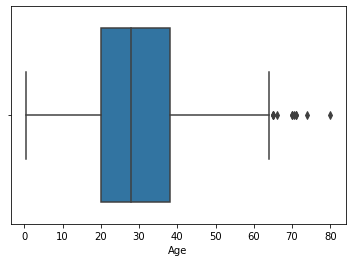

In [48]:
sns.boxplot('Age',data=df)

In [49]:
def impute_nan(df,variable,median,extreme):
    df[variable+"_end_distribution"]=df[variable].fillna(extreme)
    df[variable].fillna(median,inplace=True)

In [50]:
impute_nan(df,'Age',df.Age.median(),extreme)

In [51]:
df.head()

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


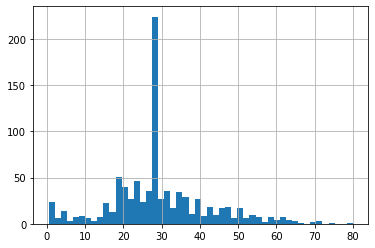

In [52]:
df['Age'].hist(bins=50)

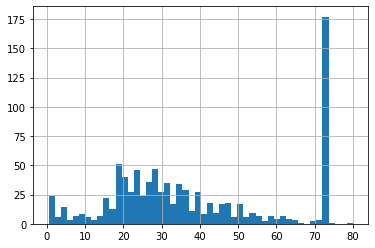

In [53]:
df['Age_end_distribution'].hist(bins=50)

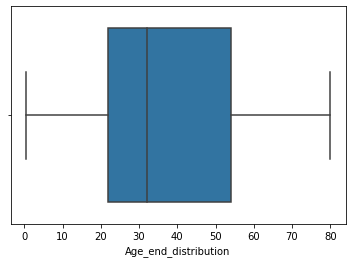

In [54]:
sns.boxplot('Age_end_distribution',data=df)

5. Arbitrary Value Imputation:
This technique was derived from kaggle competition. It consists of replacing NAN by an arbitrary value.

Advanatges and Disadvantages of Arbitrary Value Imputation:

Advantages:

1. Easy to implement
2. Captures the importance of missingess if there is one

Disadvantages:

1. Distorts the original distribution of the variable
2. If missingess is not important, it may mask the predictive power of the original variable by distorting its distribution
3. Hard to decide which value to use

In [55]:
import pandas as pd

In [56]:
df=pd.read_csv("titanic.csv", usecols=["Age","Fare","Survived"])

In [57]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [58]:
def impute_nan(df,variable):
    df[variable+'_zero']=df[variable].fillna(0)
    df[variable+'_hundred']=df[variable].fillna(100)

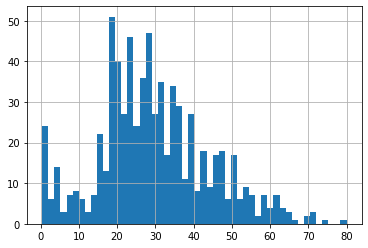

In [59]:
df['Age'].hist(bins=50)

## All Techniques to handle Categorical Missing Values

####  All Techniques to handle Categorical Missing Values are:
1. Frequent categories Imputation
2. Compute the frequency with every feature
3. Adding a variable to capture NAN

[Suppose if you have more frequent categories, we just replace NAN with a new category]

1. Frequent categories Imputation:

In [60]:
df=pd.read_csv('loan.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [61]:
df.shape

(1460, 4)

In [62]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [63]:
df.isnull().mean().sort_values(ascending=True)

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

2. Compute the frequency with every feature:

Advantages:

1. Easy To implement
2. Fater way to implement

Disadvantages:

1. Since we are using the more frequent labels, it may use them in an over respresented way, if there are many nan's
2. It distorts the relation of the most frequent label

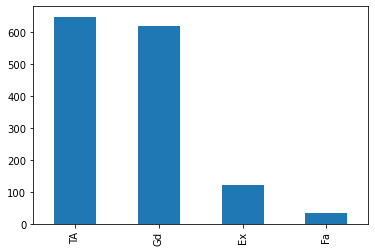

In [64]:
df['BsmtQual'].value_counts().plot.bar()

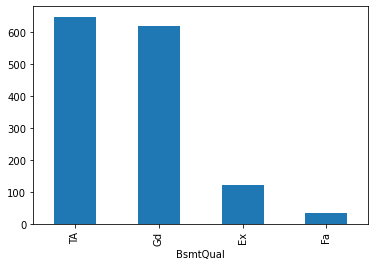

In [65]:
df.groupby(['BsmtQual'])['BsmtQual'].count().sort_values(ascending=False).plot.bar()

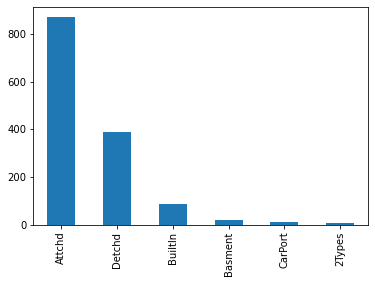

In [66]:
df['GarageType'].value_counts().plot.bar()

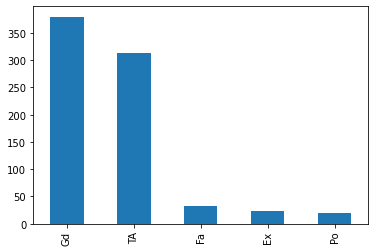

In [67]:
df['FireplaceQu'].value_counts().plot.bar()

In [68]:
df['GarageType'].value_counts().index[0]

'Attchd'

In [69]:
df['GarageType'].mode()[0]

'Attchd'

In [70]:
def impute_nan(df,variable):
    most_frequent_category=df[variable].mode()[0]
    df[variable].fillna(most_frequent_category,inplace=True)

In [71]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feature)

In [72]:
df.isnull().mean()

BsmtQual       0.0
FireplaceQu    0.0
GarageType     0.0
SalePrice      0.0
dtype: float64

3. Adding a variable to capture NAN:

In [73]:
df=pd.read_csv('loan.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [74]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [75]:
import numpy as np

In [76]:
df['BsmtQual_Var']=np.where(df['BsmtQual'].isnull(),1,0)

In [77]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [78]:
df['BsmtQual'].mode()[0]

'TA'

In [82]:
#df['BsmtQual'].fillna(frequent,inplace=True)

In [83]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [84]:
df['FireplaceQu_Var']=np.where(df['FireplaceQu'].isnull(),1,0)
frequent=df['FireplaceQu'].mode()[0]
df['FireplaceQu'].fillna(frequent,inplace=True)

In [85]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var,FireplaceQu_Var
0,Gd,Gd,Attchd,208500,0,1
1,Gd,TA,Attchd,181500,0,0
2,Gd,TA,Attchd,223500,0,0
3,TA,Gd,Detchd,140000,0,0
4,Gd,TA,Attchd,250000,0,0


[Suppose if you have more frequent categories, we just replace NAN with a new category]:

In [86]:
df=pd.read_csv('loan.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [87]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [88]:
def impute_nan(df,variable):
    df[variable+"newvar"]=np.where(df[variable].isnull(),"Missing",df[variable])

In [89]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feature)

In [90]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQualnewvar,FireplaceQunewvar,GarageTypenewvar
0,Gd,NaN,Attchd,208500,Gd,Missing,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd


In [91]:
df=df.drop(['BsmtQual','FireplaceQu','GarageType'],axis=1)

In [92]:
df.head()

,SalePrice,BsmtQualnewvar,FireplaceQunewvar,GarageTypenewvar
0,208500,Gd,Missing,Attchd
1,181500,Gd,TA,Attchd
2,223500,Gd,TA,Attchd
3,140000,TA,Gd,Detchd
4,250000,Gd,TA,Attchd


## Handle Categorical Features

#### All Techniques To Handle Categorical Features are:
1. One Hot Encoding
2. Ordinal Number Encoding
3. Count Or Frequency Encoding
4. Target Guided Ordinal Encoding
5. Mean Encoding
6. Probability Ratio Encoding

1. One Hot Encoding:

In [93]:
import pandas as pd

In [94]:
df=pd.read_csv('titanic.csv',usecols=['Sex'])

In [95]:
df.head()

,Sex
0,male
1,female
2,female
3,female
4,male


In [96]:
pd.get_dummies(df,drop_first=True).head()

,Sex_male
0,1
1,0
2,0
3,0
4,1


In [97]:
df=pd.read_csv('titanic.csv',usecols=['Embarked'])

In [98]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [99]:
df.dropna(inplace=True)

In [100]:
pd.get_dummies(df,drop_first=True).head()

,Embarked_Q,Embarked_S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [101]:
#### Onehotencoding variables with many categories in a feature

In [103]:
df=pd.read_csv('mercedes.csv',usecols=["X0","X1","X2","X3","X4","X5","X6"])

In [104]:
df.head()

,X0,X1,X2,X3,X4,X5,X6
0,k,v,at,a,d,u,j
1,k,t,av,e,d,y,l
2,az,w,n,c,d,x,j
3,az,t,n,f,d,x,l
4,az,v,n,f,d,h,d


In [105]:
for i in df.columns:
    print(len(df[i].unique()))

47
27
44
7
4
29
12


In [106]:
# let's find the top 10 most frequent categories for the variable X1
df.X1.value_counts().sort_values(ascending=False).head(10)

aa    833
s     598
b     592
l     590
v     408
r     251
i     203
a     143
c     121
o      82
Name: X1, dtype: int64

In [107]:
# let's make a list with the most frequent categories of the variable
lst_10=df.X1.value_counts().sort_values(ascending=False).head(10).index
lst_10=list(lst_10)

In [108]:
lst_10

['aa', 's', 'b', 'l', 'v', 'r', 'i', 'a', 'c', 'o']

In [109]:
import numpy as np

In [110]:
for categories in lst_10:
    df[categories]=np.where(df['X1']==categories,1,0)

In [111]:
lst_10.append('X1')

In [112]:
df[lst_10]

,aa,s,b,l,v,r,i,a,c,o,X1
0,0,0,0,0,1,0,0,0,0,0,v
1,0,0,0,0,0,0,0,0,0,0,t
2,0,0,0,0,0,0,0,0,0,0,w
3,0,0,0,0,0,0,0,0,0,0,t
4,0,0,0,0,1,0,0,0,0,0,v
...,...,...,...,...,...,...,...,...,...,...,...
4204,0,1,0,0,0,0,0,0,0,0,s
4205,0,0,0,0,0,0,0,0,0,1,o
4206,0,0,0,0,1,0,0,0,0,0,v
4207,0,0,0,0,0,1,0,0,0,0,r


2. Ordinal Number Encoding:

Ordinal categorical variables-

Ordinal data is a categorical, statistical data type where the variables have natural, ordered categories and the distances between the categories is not known.


For example:

Student's grade in an exam (A, B, C or Fail).
Educational level, with the categories: Elementary school, High school, College graduate, PhD ranked from 1 to 4.
When the categorical variables are ordinal, the most straightforward best approach is to replace the labels by some ordinal number based on the ranks.



Ordinal Measurement Advantages-
Ordinal measurement is normally used for surveys and questionnaires. Statistical analysis is applied to the responses once they are collected to place the people who took the survey into the various categories. The data is then compared to draw inferences and conclusions about the whole surveyed population with regard to the specific variables. The advantage of using ordinal measurement is ease of collation and categorization. If you ask a survey question without providing the variables, the answers are likely to be so diverse they cannot be converted to statistics.

With Respect to Machine Learning

1. Keeps the semantical information of the variable (human readable content)
2. Straightforward


Ordinal Measurement Disadvantages - 
The same characteristics of ordinal measurement that create its advantages also create certain disadvantages. The responses are often so narrow in relation to the question that they create or magnify bias that is not factored into the survey. For example, on the question about satisfaction with the governor, people might be satisfied with his job performance but upset about a recent sex scandal. The survey question might lead respondents to state their dissatisfaction about the scandal, in spite of satisfaction with his job performance -- but the statistical conclusion will not differentiate.

With Respect to Machine Learning

Does not add machine learning valuable information

In [131]:
import datetime

In [132]:
today_date=datetime.datetime.today()

In [133]:
today_date

datetime.datetime(2020, 10, 14, 21, 58, 41, 545253)

In [134]:
today_date-datetime.timedelta(3)

datetime.datetime(2020, 10, 11, 21, 58, 41, 545253)

In [135]:
# List Comprehension
days=[today_date-datetime.timedelta(x) for x in range(0,15)]

In [136]:
import pandas as pd
data=pd.DataFrame(days)
data.columns=["Day"]

In [137]:
data.head()

,Day
0,2020-10-14 21:58:41.545253
1,2020-10-13 21:58:41.545253
2,2020-10-12 21:58:41.545253
3,2020-10-11 21:58:41.545253
4,2020-10-10 21:58:41.545253


In [138]:
data['weekday']=data['Day'].dt.day_name
data.head()

,Day,weekday
0,2020-10-14 21:58:41.545253,<bound method PandasDelegate._add_delegate_acc...
1,2020-10-13 21:58:41.545253,<bound method PandasDelegate._add_delegate_acc...
2,2020-10-12 21:58:41.545253,<bound method PandasDelegate._add_delegate_acc...
3,2020-10-11 21:58:41.545253,<bound method PandasDelegate._add_delegate_acc...
4,2020-10-10 21:58:41.545253,<bound method PandasDelegate._add_delegate_acc...


In [139]:
dictionary={'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7}

In [140]:
dictionary

{'Monday': 1,
 'Tuesday': 2,
 'Wednesday': 3,
 'Thursday': 4,
 'Friday': 5,
 'Saturday': 6,
 'Sunday': 7}

In [141]:
data['weekday_ordinal']=data['weekday'].map(dictionary)
data

,Day,weekday,weekday_ordinal
0,2020-10-14 21:58:41.545253,<bound method PandasDelegate._add_delegate_acc...,NaN
1,2020-10-13 21:58:41.545253,<bound method PandasDelegate._add_delegate_acc...,NaN
2,2020-10-12 21:58:41.545253,<bound method PandasDelegate._add_delegate_acc...,NaN
3,2020-10-11 21:58:41.545253,<bound method PandasDelegate._add_delegate_acc...,NaN
4,2020-10-10 21:58:41.545253,<bound method PandasDelegate._add_delegate_acc...,NaN
5,2020-10-09 21:58:41.545253,<bound method PandasDelegate._add_delegate_acc...,NaN
6,2020-10-08 21:58:41.545253,<bound method PandasDelegate._add_delegate_acc...,NaN
7,2020-10-07 21:58:41.545253,<bound method PandasDelegate._add_delegate_acc...,NaN
8,2020-10-06 21:58:41.545253,<bound method PandasDelegate._add_delegate_acc...,NaN
9,2020-10-05 21:58:41.545253,<bound method PandasDelegate._add_delegate_acc...,NaN


In [142]:
import pandas as pd
import datetime

In [143]:
df_base = datetime.datetime.today()
df_date_list = [df_base - datetime.timedelta(days=x) for x in range(0, 20)]
df = pd.DataFrame(df_date_list)
df.columns = ['day']
df

,day
0,2020-10-14 21:59:20.206187
1,2020-10-13 21:59:20.206187
2,2020-10-12 21:59:20.206187
3,2020-10-11 21:59:20.206187
4,2020-10-10 21:59:20.206187
5,2020-10-09 21:59:20.206187
6,2020-10-08 21:59:20.206187
7,2020-10-07 21:59:20.206187
8,2020-10-06 21:59:20.206187
9,2020-10-05 21:59:20.206187


In [144]:
# extract the week day name
df['day_of_week'] = df['day'].dt.day_name
df.head()

,day,day_of_week
0,2020-10-14 21:59:20.206187,<bound method PandasDelegate._add_delegate_acc...
1,2020-10-13 21:59:20.206187,<bound method PandasDelegate._add_delegate_acc...
2,2020-10-12 21:59:20.206187,<bound method PandasDelegate._add_delegate_acc...
3,2020-10-11 21:59:20.206187,<bound method PandasDelegate._add_delegate_acc...
4,2020-10-10 21:59:20.206187,<bound method PandasDelegate._add_delegate_acc...


In [145]:
# Engineer categorical variable by ordinal number replacement

weekday_map = {'Monday':1,
               'Tuesday':2,
               'Wednesday':3,
               'Thursday':4,
               'Friday':5,
               'Saturday':6,
               'Sunday':7}

df['day_ordinal'] = df.day_of_week.map(weekday_map)
df.head(20)

,day,day_of_week,day_ordinal
0,2020-10-14 21:59:20.206187,<bound method PandasDelegate._add_delegate_acc...,NaN
1,2020-10-13 21:59:20.206187,<bound method PandasDelegate._add_delegate_acc...,NaN
2,2020-10-12 21:59:20.206187,<bound method PandasDelegate._add_delegate_acc...,NaN
3,2020-10-11 21:59:20.206187,<bound method PandasDelegate._add_delegate_acc...,NaN
4,2020-10-10 21:59:20.206187,<bound method PandasDelegate._add_delegate_acc...,NaN
5,2020-10-09 21:59:20.206187,<bound method PandasDelegate._add_delegate_acc...,NaN
6,2020-10-08 21:59:20.206187,<bound method PandasDelegate._add_delegate_acc...,NaN
7,2020-10-07 21:59:20.206187,<bound method PandasDelegate._add_delegate_acc...,NaN
8,2020-10-06 21:59:20.206187,<bound method PandasDelegate._add_delegate_acc...,NaN
9,2020-10-05 21:59:20.206187,<bound method PandasDelegate._add_delegate_acc...,NaN


3. Count Or Frequency Encoding:


High Cardinality-

Another way to refer to variables that have a multitude of categories, is to call them variables with high cardinality.

If we have categorical variables containing many multiple labels or high cardinality,then by using one hot encoding, we will expand the feature space dramatically.

One approach that is heavily used in Kaggle competitions, is to replace each label of the categorical variable by the count, this is the amount of times each label appears in the dataset. Or the frequency, this is the percentage of observations within that category. The 2 are equivalent.


Advantages:

1. Easy To Use
2. Not increasing feature dimensional space

Disadvantages:
1. It will provide same weight if the frequencies are same.
2. If some of the labels have the same count, then they will be replaced with the same count and they will loose some valuable information.
3. Adds somewhat arbitrary numbers, and therefore weights to the different labels, that may not be related to their predictive power.

In [146]:
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data' , header = None,index_col=None)

In [147]:
train_set.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [148]:
columns=[1,3,5,6,7,8,9,13]

In [149]:
train_set=train_set[columns]

In [150]:
train_set.columns=['Employment','Degree','Status','Designation','family_job','Race','Sex','Country']

In [151]:
train_set.head()

,Employment,Degree,Status,Designation,family_job,Race,Sex,Country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba


In [152]:
for feature in train_set.columns[:]:
    print(feature,":",len(train_set[feature].unique()),'labels')

Employment : 9 labels
Degree : 16 labels
Status : 7 labels
Designation : 15 labels
family_job : 6 labels
Race : 5 labels
Sex : 2 labels
Country : 42 labels


In [153]:
country_map=train_set['Country'].value_counts().to_dict()

In [154]:
train_set['Country']=train_set['Country'].map(country_map)
train_set.head(20)

,Employment,Degree,Status,Designation,family_job,Race,Sex,Country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,29170
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,29170
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,29170
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,29170
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,95
5,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,29170
6,Private,9th,Married-spouse-absent,Other-service,Not-in-family,Black,Female,81
7,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,29170
8,Private,Masters,Never-married,Prof-specialty,Not-in-family,White,Female,29170
9,Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,29170


4. Target Guided Ordinal Encoding:

a. Ordering the labels according to the target

b. Replace the labels by the joint probability of being 1 or 0

In [155]:
import pandas as pd
df=pd.read_csv('titanic.csv', usecols=['Cabin','Survived'])
df.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [156]:
df['Cabin'].fillna('Missing',inplace=True)

In [157]:
df['Cabin']=df['Cabin'].astype(str).str[0]

In [158]:
df.head()

,Survived,Cabin
0,0,M
1,1,C
2,1,M
3,1,C
4,0,M


In [159]:
df.Cabin.unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [160]:
df.groupby(['Cabin'])['Survived'].mean()

Cabin
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
M    0.299854
T    0.000000
Name: Survived, dtype: float64

In [161]:
df.groupby(['Cabin'])['Survived'].mean().sort_values().index

Index(['T', 'M', 'A', 'G', 'C', 'F', 'B', 'E', 'D'], dtype='object', name='Cabin')

In [162]:
ordinal_labels=df.groupby(['Cabin'])['Survived'].mean().sort_values().index
ordinal_labels

Index(['T', 'M', 'A', 'G', 'C', 'F', 'B', 'E', 'D'], dtype='object', name='Cabin')

In [163]:
enumerate(ordinal_labels,0)

In [164]:
ordinal_labels2={k:i for i,k in enumerate(ordinal_labels,0)}
ordinal_labels2

{'T': 0, 'M': 1, 'A': 2, 'G': 3, 'C': 4, 'F': 5, 'B': 6, 'E': 7, 'D': 8}

In [165]:
df['Cabin_ordinal_labels']=df['Cabin'].map(ordinal_labels2)
df.head()

,Survived,Cabin,Cabin_ordinal_labels
0,0,M,1
1,1,C,4
2,1,M,1
3,1,C,4
4,0,M,1


5. Mean Encoding:

In [166]:
mean_ordinal=df.groupby(['Cabin'])['Survived'].mean().to_dict()

In [167]:
mean_ordinal

{'A': 0.4666666666666667,
 'B': 0.7446808510638298,
 'C': 0.5932203389830508,
 'D': 0.7575757575757576,
 'E': 0.75,
 'F': 0.6153846153846154,
 'G': 0.5,
 'M': 0.29985443959243085,
 'T': 0.0}

In [168]:
df['mean_ordinal_encode']=df['Cabin'].map(mean_ordinal)
df.head()

,Survived,Cabin,Cabin_ordinal_labels,mean_ordinal_encode
0,0,M,1,0.299854
1,1,C,4,0.593220
2,1,M,1,0.299854
3,1,C,4,0.593220
4,0,M,1,0.299854


6. Probability Ratio Encoding:


a. Probability of Survived based on Cabin--- Categorical Feature

b. Probability of Not Survived---1-pr(Survived)

c. pr(Survived)/pr(Not Survived)

d. Dictonary to map cabin with probability

e. replace with the categorical feature

In [169]:
import pandas as pd

In [170]:
df=pd.read_csv('titanic.csv',usecols=['Cabin','Survived'])
df.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [171]:
df['Cabin'].fillna('Missing',inplace=True)
df.head()

,Survived,Cabin
0,0,Missing
1,1,C85
2,1,Missing
3,1,C123
4,0,Missing


In [172]:
df['Cabin'].unique()

array(['Missing', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62

In [173]:
df['Cabin']=df['Cabin'].astype(str).str[0]
df.head()

,Survived,Cabin
0,0,M
1,1,C
2,1,M
3,1,C
4,0,M


In [174]:
df.Cabin.unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [175]:
prob_df=df.groupby(['Cabin'])['Survived'].mean()

In [176]:
prob_df=pd.DataFrame(prob_df)
prob_df

,Survived
Cabin,
A,0.466667
B,0.744681
C,0.593220
D,0.757576
E,0.750000
F,0.615385
G,0.500000
M,0.299854
T,0.000000


In [177]:
prob_df['Died']=1-prob_df['Survived']

In [178]:
prob_df.head()

,Survived,Died
Cabin,,
A,0.466667,0.533333
B,0.744681,0.255319
C,0.593220,0.406780
D,0.757576,0.242424
E,0.750000,0.250000


In [179]:
prob_df['Probability_ratio']=prob_df['Survived']/prob_df['Died']
prob_df.head()

,Survived,Died,Probability_ratio
Cabin,,,
A,0.466667,0.533333,0.875000
B,0.744681,0.255319,2.916667
C,0.593220,0.406780,1.458333
D,0.757576,0.242424,3.125000
E,0.750000,0.250000,3.000000


In [180]:
probability_encoded=prob_df['Probability_ratio'].to_dict()

In [181]:
df['Cabin_encoded']=df['Cabin'].map(probability_encoded)
df.head(20)

,Survived,Cabin,Cabin_encoded
0,0,M,0.428274
1,1,C,1.458333
2,1,M,0.428274
3,1,C,1.458333
4,0,M,0.428274
5,0,M,0.428274
6,0,E,3.000000
7,0,M,0.428274
8,1,M,0.428274
9,1,M,0.428274


## Transformation of Features:
Why Transformation of Features Are Required?

Linear Regression---Gradient Descent ----Global Minima
Algorithms like KNN,K Means,Hierarichal Clustering--- Eucledian Distance
Every Point has some vectors and Directiom

Deep Learning Techniques(Standardization, Scaling) 1.ANN--->GLobal Minima, Gradient 2.CNN 3.RNN
[0-255 pixels]

Types Of Transformation:
1. Normalization And Standardization
2. Scaling to Minimum And Maximum values
3. Scaling To Median And Quantiles/Robust Scaler
4. Guassian Transformation 

4.1. Logarithmic Transformation 

4.2. Reciprocal Trnasformation 

4.3. Square Root Transformation 

4.4. Exponential Trnasformation 

4.5. Box Cox Transformation

1. Standardization:
We try to bring all the variables or features to a similar scale. 
Standarisation means centering the variable at zero. z=(x-x_mean)/std

In [182]:
import pandas as pd
df=pd.read_csv('titanic.csv', usecols=['Pclass','Age','Fare','Survived'])
df.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [183]:
df['Age'].fillna(df.Age.median(),inplace=True)

In [184]:
df.isnull().sum()

Survived    0
Pclass      0
Age         0
Fare        0
dtype: int64

In [185]:
# standarisation: We use the Standardscaler from sklearn library
from sklearn.preprocessing import StandardScaler

In [186]:
scaler=StandardScaler()
### fit vs fit_transform
df_scaled=scaler.fit_transform(df)

In [187]:
import matplotlib.pyplot as plt
%matplotlib inline

In [188]:
df_scaled

array([[-0.78927234,  0.82737724, -0.56573646, -0.50244517],
       [ 1.2669898 , -1.56610693,  0.66386103,  0.78684529],
       [ 1.2669898 ,  0.82737724, -0.25833709, -0.48885426],
       ...,
       [-0.78927234,  0.82737724, -0.1046374 , -0.17626324],
       [ 1.2669898 , -1.56610693, -0.25833709, -0.04438104],
       [-0.78927234,  0.82737724,  0.20276197, -0.49237783]])

(array([216.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 184.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 491.]),
 array([-1.56610693, -1.44643272, -1.32675851, -1.2070843 , -1.08741009,
        -0.96773588, -0.84806167, -0.72838747, -0.60871326, -0.48903905,
        -0.36936484, -0.24969063, -0.13001642, -0.01034222,  0.10933199,
         0.2290062 ,  0.34868041,  0.46835462,  0.58802883,  0.70770304,
         0.82737724]),
 <a list of 20 Patch objects>)

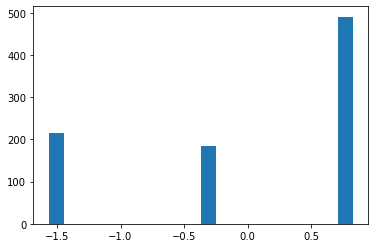

In [189]:
plt.hist(df_scaled[:,1],bins=20)

(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([-2.22415608, -1.91837055, -1.61258503, -1.3067995 , -1.00101397,
        -0.69522845, -0.38944292, -0.08365739,  0.22212813,  0.52791366,
         0.83369919,  1.13948471,  1.44527024,  1.75105577,  2.05684129,
         2.36262682,  2.66841235,  2.97419787,  3.2799834 ,  3.58576892,
         3.89155445]),
 <a list of 20 Patch objects>)

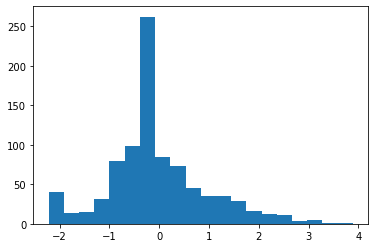

In [190]:
plt.hist(df_scaled[:,2],bins=20)

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([-0.64842165, -0.13264224,  0.38313716,  0.89891657,  1.41469598,
         1.93047539,  2.4462548 ,  2.96203421,  3.47781362,  3.99359303,
         4.50937244,  5.02515184,  5.54093125,  6.05671066,  6.57249007,
         7.08826948,  7.60404889,  8.1198283 ,  8.63560771,  9.15138712,
         9.66716653]),
 <a list of 20 Patch objects>)

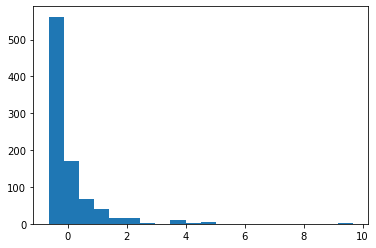

In [191]:
plt.hist(df_scaled[:,3],bins=20)

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  25.61646,  51.23292,  76.84938, 102.46584, 128.0823 ,
        153.69876, 179.31522, 204.93168, 230.54814, 256.1646 , 281.78106,
        307.39752, 333.01398, 358.63044, 384.2469 , 409.86336, 435.47982,
        461.09628, 486.71274, 512.3292 ]),
 <a list of 20 Patch objects>)

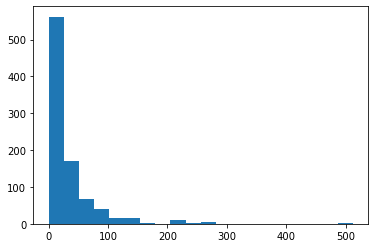

In [192]:
plt.hist(df['Fare'],bins=20)

2. Min Max Scaling (### CNN)---Deep Learning Techniques
Min Max Scaling scales the values between 0 to 1. 

X_scaled = (X - X.min / (X.max - X.min)

In [193]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
df_minmax=pd.DataFrame(min_max.fit_transform(df),columns=df.columns)
df_minmax.head()

,Survived,Pclass,Age,Fare
0,0.0,1.0,0.271174,0.014151
1,1.0,0.0,0.472229,0.139136
2,1.0,1.0,0.321438,0.015469
3,1.0,0.0,0.434531,0.103644
4,0.0,1.0,0.434531,0.015713


(array([216.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 184.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 491.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

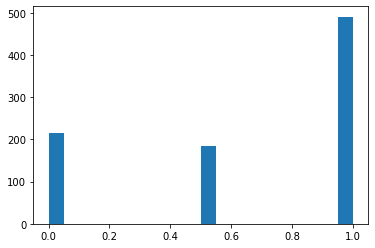

In [194]:
plt.hist(df_minmax['Pclass'],bins=20)

(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

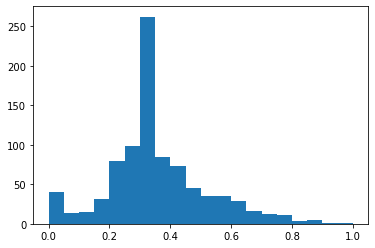

In [195]:
plt.hist(df_minmax['Age'],bins=20)

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

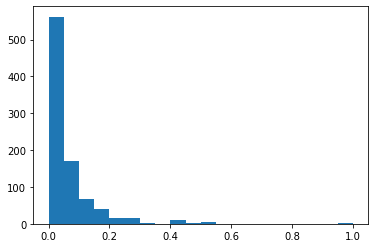

In [196]:
plt.hist(df_minmax['Fare'],bins=20)

3. Robust Scaler OR Scaling To Median And Quantiles:
It is used to scale the feature to median and quantiles Scaling using median and quantiles consists of substracting the median to all the observations, and then dividing by the interquantile difference. The interquantile difference is the difference between the 75th and 25th quantile:

IQR = 75th quantile - 25th quantile

X_scaled = (X - X.median) / IQR

0,1,2,3,4,5,6,7,8,9,10

9-90 percentile---90% of all values in this group is less than 9 1-10 precentile---10% of all values in this group is less than 1 4-40%

In [197]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
df_robust_scaler=pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
df_robust_scaler.head()

,Survived,Pclass,Age,Fare
0,0.0,0.0,-0.461538,-0.312011
1,1.0,-2.0,0.769231,2.461242
2,1.0,0.0,-0.153846,-0.282777
3,1.0,-2.0,0.538462,1.673732
4,0.0,0.0,0.538462,-0.277363


(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([-2.12153846, -1.81546154, -1.50938462, -1.20330769, -0.89723077,
        -0.59115385, -0.28507692,  0.021     ,  0.32707692,  0.63315385,
         0.93923077,  1.24530769,  1.55138462,  1.85746154,  2.16353846,
         2.46961538,  2.77569231,  3.08176923,  3.38784615,  3.69392308,
         4.        ]),
 <a list of 20 Patch objects>)

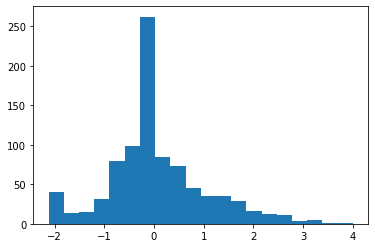

In [198]:
plt.hist(df_robust_scaler['Age'],bins=20)

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([-0.62600478,  0.48343237,  1.59286952,  2.70230667,  3.81174382,
         4.92118096,  6.03061811,  7.14005526,  8.24949241,  9.35892956,
        10.46836671, 11.57780386, 12.68724101, 13.79667816, 14.90611531,
        16.01555246, 17.12498961, 18.23442675, 19.3438639 , 20.45330105,
        21.5627382 ]),
 <a list of 20 Patch objects>)

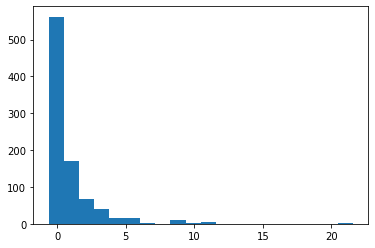

In [199]:
plt.hist(df_robust_scaler['Fare'],bins=20)

4. Guassian Transformation
Some machine learning algorithms like linear and logistic assume that the features are normally distributed -Accuracy -Performance.

4.1. logarithmic transformation

4.2. reciprocal transformation

4.3. square root transformation

4.4. exponential transformation (more general, you can use any exponent)

4.5. boxcox transformation

In [200]:
df=pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [201]:
df['Age']=df['Age'].fillna(df['Age'].median())

In [202]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [203]:
import scipy.stats as stat
import pylab 

In [204]:
# If you want to check whether feature is guassian or normal distributed
# Q-Q plot
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()  

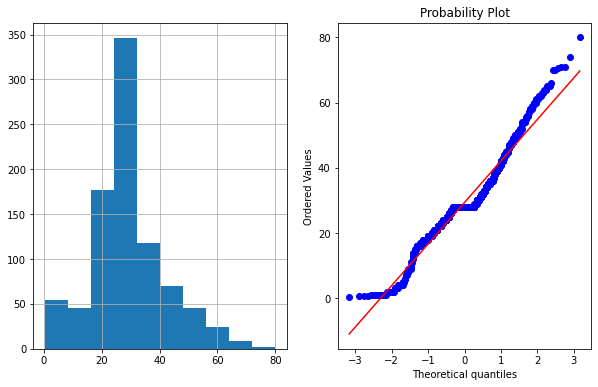

In [205]:
plot_data(df,'Age')

4.1. logarithmic transformation: 

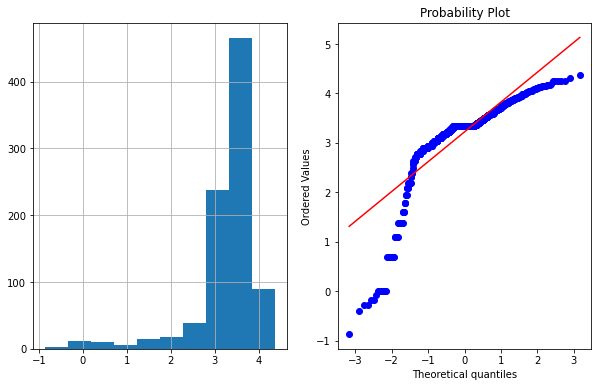

In [206]:
import numpy as np
df['Age_log']=np.log(df['Age'])
plot_data(df,'Age_log')

4.2. reciprocal transformation:

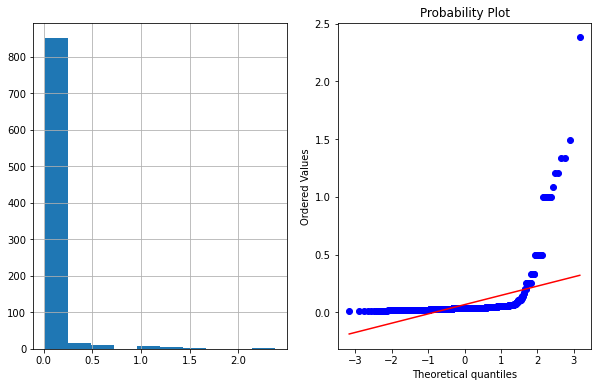

In [207]:
df['Age_reciprocal']=1/df.Age
plot_data(df,'Age_reciprocal')

4.3. square root transformation:

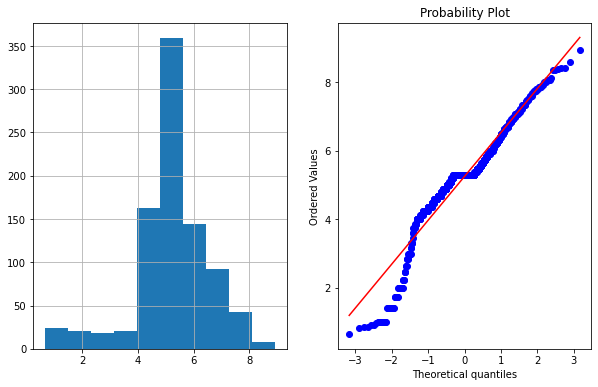

In [208]:
df['Age_sqaure']=df.Age**(1/2)
plot_data(df,'Age_sqaure')

4.4. exponential transformation:

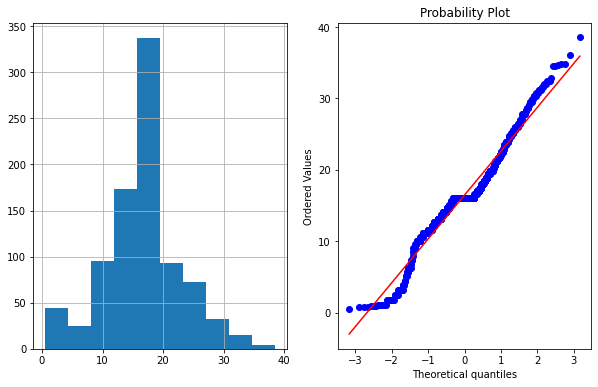

In [209]:
df['Age_exponential']=df.Age**(1/1.2)
plot_data(df,'Age_exponential')

4.5. boxcox transformation:

The Box-Cox transformation is defined as:

T(Y)=(Y exp(λ)−1)/λ

where Y is the response variable and λ is the transformation parameter. 
λ varies from -5 to 5. In the transformation, all values of λ are considered and the optimal value for a given variable is selected.

In [210]:
df['Age_Boxcox'],parameters=stat.boxcox(df['Age'])

In [211]:
print(parameters)

0.7964531473656952


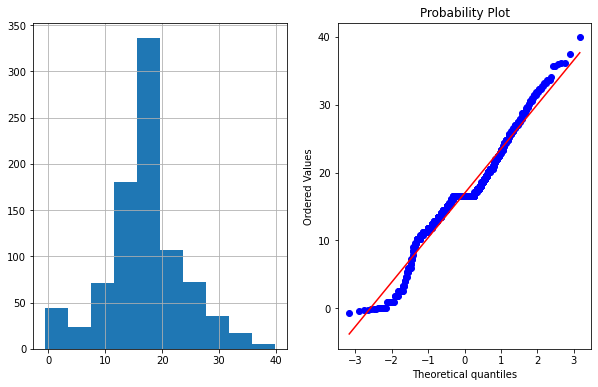

In [212]:
plot_data(df,'Age_Boxcox')

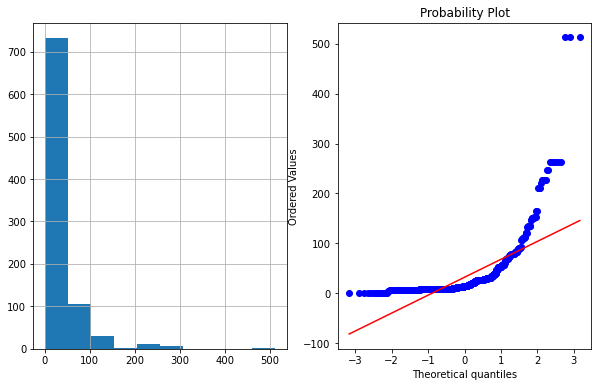

In [213]:
plot_data(df,'Fare')

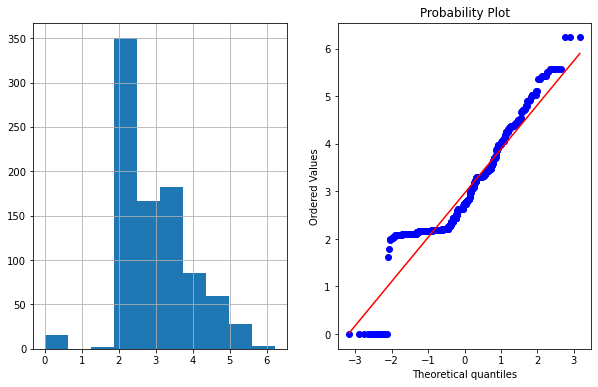

In [214]:
df['Fare_log']=np.log1p(df['Fare'])
plot_data(df,'Fare_log')

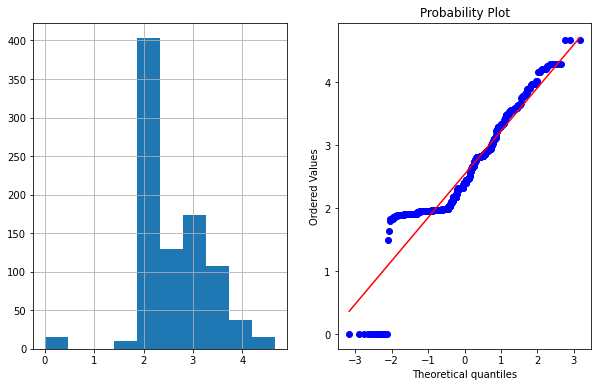

In [215]:
df['Fare_Boxcox'],parameters=stat.boxcox(df['Fare']+1)
plot_data(df,'Fare_Boxcox')